# Trabajo Práctico N1. Procesamiento de Imágenes

## Ejercicio 1

Considerando que la distancia focal de un ojo humano está entre 14mm y 17mm. La distancia entre el ojo y el celular es de 30cm. Nuestro "sensor" es de 1.5mm x 1.5mm por lo tanto, el tamaño del menor punto visible es de

In [127]:
!pip install opencv-python matplotlib numpy


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [128]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 4

In [129]:
def generate(background: int, foreground: int):
    gen = np.full((3, 3, 3), (background,)*3, dtype=np.uint8)
    gen[1, 1, :] = (foreground,) * 3
    return gen

(-0.5, 2.5, 2.5, -0.5)

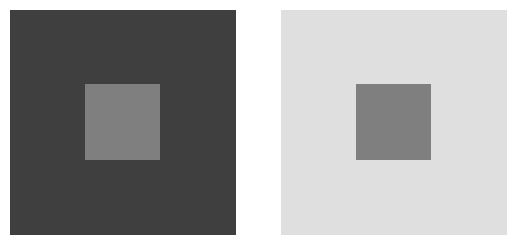

In [130]:
# TODO: Variar pixel_central hasta que parezan iguales
pixel_central = 127

dark = generate(63, pixel_central)
light = generate(223, pixel_central)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(dark)
ax2.imshow(light)

ax1.axis('off')
ax2.axis('off')

# Ejercicio 5

Text(0.5, 1.0, 'Original')

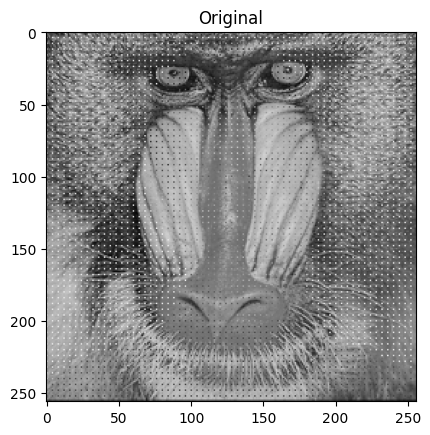

In [131]:
mono_img = cv2.imread("mono.bmp")

plt.imshow(mono_img)
plt.title('Original')

In [132]:
def sample(offset_x: int, offset_y: int):
    return mono_img[offset_x::4, offset_y::4, :]

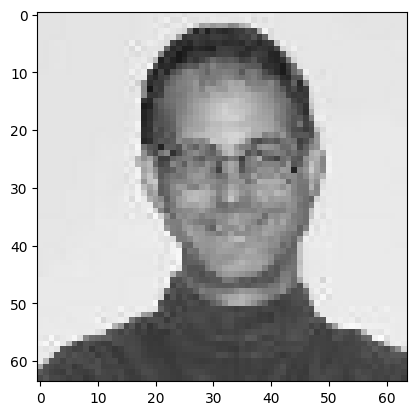

In [133]:
sample_0 = sample(0, 0)
plt.imshow(sample_0)

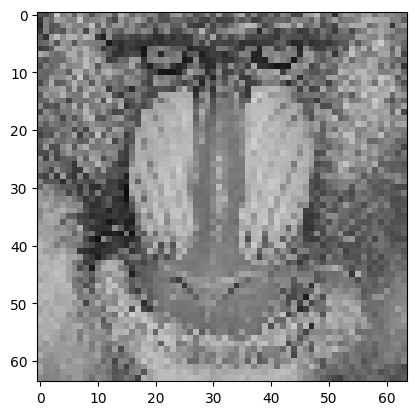

In [134]:
sample_1 = sample(1, 1)
plt.imshow(sample_1)

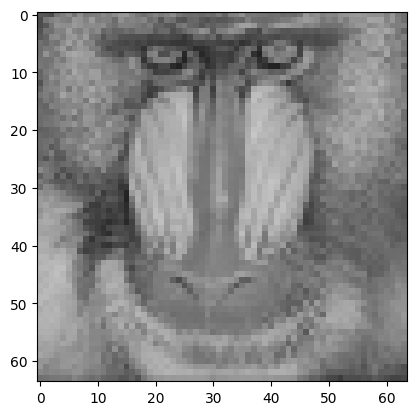

In [148]:
average = sum(sample(x, y).astype(np.int64) for x in range(4) for y in range(4)) / 16
average = average.astype(np.uint8)
plt.imshow(average)

In [362]:
original_size = mono_img.shape[:-1]

def to_3channels(img):
    rgb = np.zeros(img.shape + (3,), dtype=img.dtype)
    rgb[:, :, 0] = img
    rgb[:, :, 1] = img
    rgb[:, :, 2] = img
    return rgb

# TODO: implementar `bilineal_sample` y `bicubic_sample` a manoo

def bilineal_sample(img, x, y):
    # print(x, y)
    x1, y1 = int(np.floor(x)), int(np.floor(y))
    # x2, y2 = int(np.ceil(x)), int(np.ceil(y))
    x2 = x1 + 1
    y2 = y1 + 1

    if x2 >= img.shape[1]:
        x1 -= 1
        x2 -= 1

    if y2 >= img.shape[0]:
        y1 -= 1
        y2 -= 1

    # print(x1, y1, x2, y2)

    # square = np.array([[img[y1, x1], img[y1, x2]], [img[y2, x1], img[y2, x2]]])
    square = img[y1:y2 + 1, x1:x2 + 1]

    res= np.array([[y2 - y, y - y1]]) @ square @ np.array([[x2 - x], [x - x1]])
    return res.astype(np.uint8)

def bilineal(img, new_size):
    height, width = img.shape[:-1]
    original_height, original_width = new_size

    f = np.vectorize(lambda y, x, c: bilineal_sample(img[:,:,int(c)], x * width / original_width, y * height / original_height))

    ours = np.fromfunction(f, new_size + (img.shape[2],))

    # return np.abs(ours.astype(np.int16) - cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR).astype(np.int16)).astype(np.uint8)
    return ours

def bicubic(img):
    return cv2.resize(img, original_size, interpolation=cv2.INTER_CUBIC)

def interpolate(img):
    plt.imshow(bilineal(img, original_size))
    plt.title("Bilineal")
    plt.show()
    plt.imshow(bicubic(img))
    plt.title("Bicubica")
    plt.show()

bilineal(np.array([[[0], [1]], [[0], [0]]]), (2, 2))

array([[[0],
        [1]],

       [[0],
        [0]]], dtype=uint8)

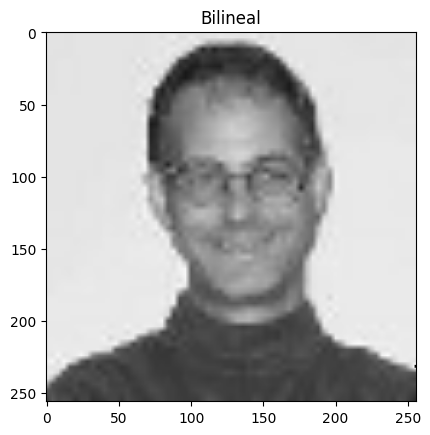

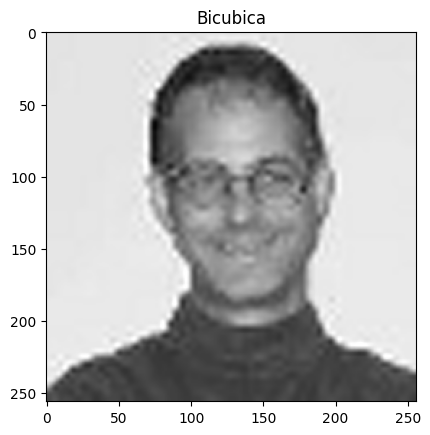

In [363]:
interpolate(sample_0)

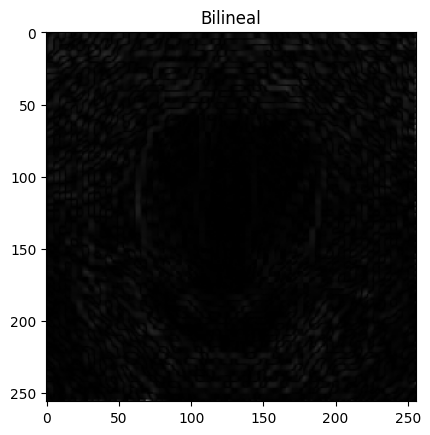

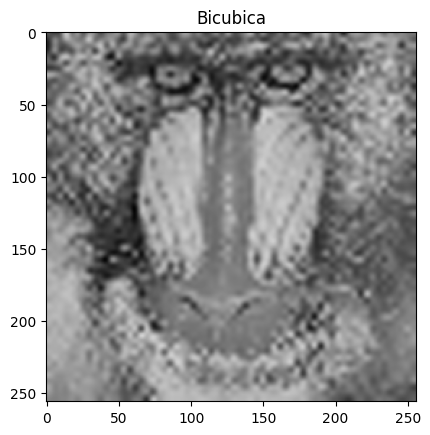

In [ ]:
interpolate(sample_1)

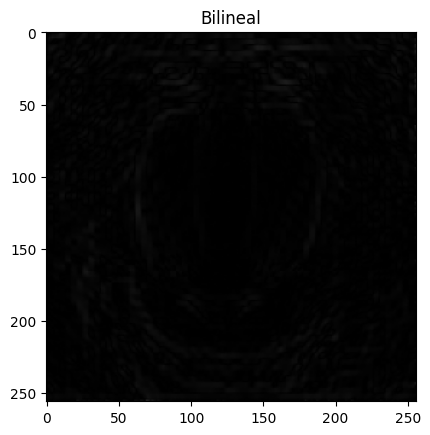

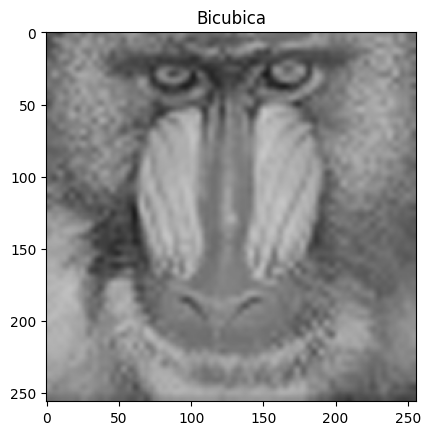

In [ ]:
interpolate(average)